<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/Convex/Orthogonal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.optimize import minimize

# 1

In [25]:


def orthogonal_regression(data, plot=False):


    x = data[:, 0]
    y = data[:, 1]


    def orthogonal_distance(params, x, y):
        m, c = params
        distances = (y - m * x - c)**2 / (1 + m**2)
        return np.sum(distances)


    initial_guess = [1, 0]


    result = minimize(orthogonal_distance, initial_guess, args=(x, y))
    m, c = result.x
    if plot == True:

        x_proj = (x + m * (y - c)) / (1 + m**2)
        y_proj = m * x_proj + c


        plt.scatter(x, y, label='Data points')
        plt.plot(x_proj, y_proj, 'b-', label='Orthogonal regression line')

        for i in range(len(x)):
            plt.plot([x[i], x_proj[i]], [y[i], y_proj[i]], 'g--')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Orthogonal Regression with Orthogonal Projections')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return m, c


# 2

In [26]:
# Address of files
%cd /content/drive/MyDrive/Uni/Optimization/Convex/ConvexBoyd/Data
!ls

/content/drive/MyDrive/Uni/Optimization/Convex/ConvexBoyd/Data
boston.csv  data1OrRe.txt  Data1.txt  data2OrRe.txt


In [27]:
def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

In [28]:
data1 = np.array(load_data('data1OrRe.txt'))
# data2 = np.array(load_data('data2OrRe.txt'))
data2 = np.array([
    [1, 0.4],
    [2, 1.1],
    [3, 2.4],
    [4, 3.8],
    [5, 5.1],
    [6, 6.8],
    [7, 8.5],
    [8, 10],
    [9, 13],
    [10, 15]
])

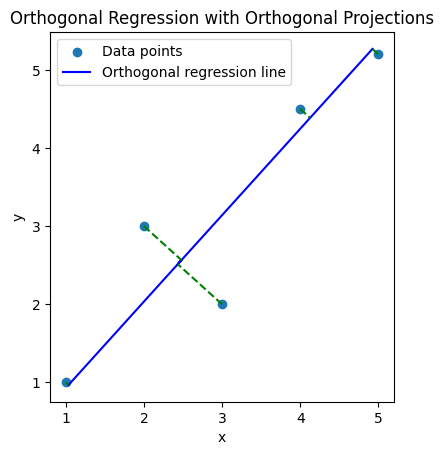

Slope: 1.1056546019237057
Intercept: -0.17696450012976195


In [29]:
slope, intercept = orthogonal_regression(data1, True)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
plt.show()

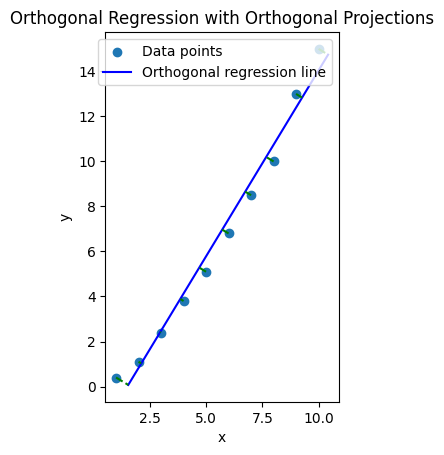

Slope: 1.6527258262228017
Intercept: -2.479991974123882


In [30]:
slope, intercept = orthogonal_regression(data2, True)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
plt.show()

# 3

In [31]:

dataB = pd.read_csv('boston.csv')
dataB.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3.1

In [32]:
data3 = dataB[["RM", "MEDV"]]

## 3.2

In [33]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data3, data3["MEDV"], test_size=0.2, random_state=42)


In [34]:
X_train

,RM,MEDV
477,5.304,12.0
15,5.834,19.9
332,6.031,19.4
423,6.103,13.4
19,5.727,18.2
...,...,...
106,5.836,19.5
270,5.856,21.1
348,6.635,24.5
435,6.629,13.4


## 3.3

In [35]:
slope, intercept = orthogonal_regression(X_train.to_numpy())
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 18.45628715456983
Intercept: -93.77136515975621


## 3.4

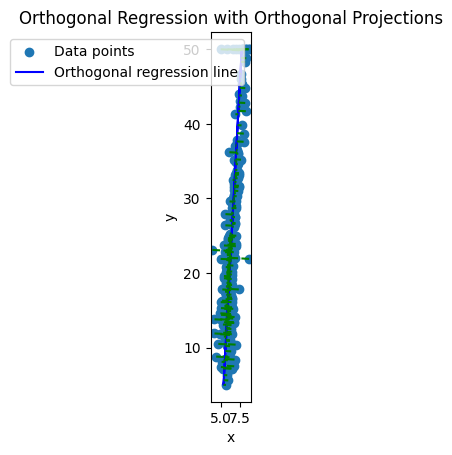

(18.45628715456983, -93.77136515975621)

In [36]:
orthogonal_regression(X_train.to_numpy(), True)

## 3.5

In [37]:
slope, intercept

(18.45628715456983, -93.77136515975621)

In [38]:
M = np.vstack((X_test["RM"].to_numpy(), np.ones_like(X_test["RM"].to_numpy()))).T
y_pred = M @ np.array([slope, intercept])
y_pred

array([ 24.64417322,  30.95622343,  16.65260089,  18.16601643,
        22.44787505,  22.11566188,  15.37911707,  20.17775173,
        21.19284753,  17.46467752,  16.0619997 ,  17.04018292,
       -10.36740351,  21.24821639,  11.57712192,  35.05351918,
        14.73314702,  -3.70468385,  51.57189618,  20.38077089,
        21.39586668,  25.86228818,  11.66940335,  27.91093605,
        17.07709549,   6.39090523,  14.64086559,  30.40253482,
        16.22810628,  13.16436261,   9.06706687,  24.8287361 ,
        41.1994628 ,   5.19124656,  17.02172663,  11.59557821,
        38.83705805,  14.54858415,  18.14756015,  21.48814812,
         5.7080226 ,  32.63574556,  54.50644584,   9.47310518,
        24.66262951,  11.66940335,  11.44792791,  24.66262951,
        20.04855772,  27.57872288,  17.13246435,  34.83204373,
        19.58715054,  31.38071804,  44.09709988,  22.72471936,
        21.00828465,  32.85722101,  24.14585347,   9.67612434,
        31.03004858,  40.01826042,  27.15422828,   6.92

## 3.6

In [39]:
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

def msa(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))

mse_error = mse(y_test, y_pred)
msa_error = msa(y_test, y_pred)

print(f"MSE error: {mse_error}")
print(f"MSA error: {msa_error}")


MSE error: 95.37789580285683
MSA error: 6.278380604364758


In [40]:

for column in dataB.columns[:-1]:
  print(column)
  data3 = dataB[[column, "MEDV"]]
  X_train, X_test, y_train, y_test = train_test_split(data3, data3["MEDV"], test_size=0.2, random_state=42)
  slope, intercept = orthogonal_regression(X_train.to_numpy())
  M = np.vstack((X_test[column].to_numpy(), np.ones_like(X_test[column].to_numpy()))).T
  y_pred = M @ np.array([slope, intercept])
  mse_error = mse(y_test, y_pred)
  msa_error = msa(y_test, y_pred)
  print(f"MSE error: {mse_error}")
  print(f"MSA error: {msa_error}")
  print("**************")




CRIM
MSE error: 83.52824685609129
MSA error: 6.80669932538032
**************
ZN
MSE error: 52.621960764697945
MSA error: 5.220080865593239
**************
INDUS
MSE error: 902470159.1883122
MSA error: 26213.055417215488
**************
CHAS
MSE error: 1983.374731152101
MSA error: 21.742239685528652
**************
NOX
MSE error: 390964011.3261783
MSA error: 16824.917322784695
**************
RM
MSE error: 95.37789580285683
MSA error: 6.278380604364758
**************
AGE
MSE error: 54.923544661697186
MSA error: 5.301442291063797
**************
DIS
MSE error: 1136.9191277022887
MSA error: 25.051500406160653
**************
RAD
MSE error: 6877995591.588833
MSA error: 71754.8839206556
**************
TAX
MSE error: 55.64233815544116
MSA error: 5.319626731155494
**************
PTRATIO
MSE error: 3302999018.551393
MSA error: 47516.81743241561
**************
B
MSE error: 68.34638849352916
MSA error: 5.997838873724251
**************
LSTAT
MSE error: 2725390654.177401
MSA error: 40218.033216251475
**

## Bonus

In [41]:
from sklearn.decomposition import PCA


X = dataB.iloc[:, :-1].values  # Features
y = dataB.iloc[:, -1].values   # Target (MEDV)


# Perform PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

columns = ['PCA_Component', 'MEDV']
data_transformed = pd.DataFrame(data=X_pca, columns=['PCA_Component'])
data_transformed['MEDV'] = y

data_transformed


,PCA_Component,MEDV
0,-119.818843,24.0
1,-168.890155,21.6
2,-169.311707,34.7
3,-190.230642,33.4
4,-190.133451,36.2
...,...,...
501,-138.697933,22.4
502,-139.504439,20.6
503,-138.387163,23.9
504,-137.505173,22.0


In [42]:

X_train, X_test, y_train, y_test = train_test_split(data_transformed, data_transformed["MEDV"], test_size=0.2, random_state=42)


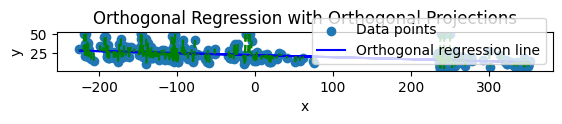

Slope: -0.025862849584546068
Intercept: 22.69547792202118


In [43]:
slope, intercept = orthogonal_regression(X_train.to_numpy(), True)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

In [44]:
M = np.vstack((X_test["PCA_Component"].to_numpy(), np.ones_like(X_test["PCA_Component"].to_numpy()))).T
y_pred = M @ np.array([slope, intercept])
y_pred

array([25.71377458, 26.91464718, 15.4255158 , 25.62153561, 16.48874373,
       23.05637074, 25.47421149, 22.15207476, 16.57177999, 23.39139971,
       26.18216178, 25.28254277, 14.19276085, 23.19729199, 25.91883415,
       16.46639746, 28.20196607, 16.36424545, 26.92250229, 16.55902521,
       27.68822196, 26.91418898, 25.14479906, 26.28260169, 15.99015637,
       16.23332238, 23.30884011, 13.62951141, 26.13755431, 23.41124608,
       25.7113793 , 26.01265146, 16.55562343, 16.45203721, 16.07582068,
       22.03165364, 27.07436115, 27.57327542, 26.12072229, 25.52023849,
       23.40204952, 27.60884846, 27.67165895, 24.63467775, 26.37037512,
       16.54642665, 25.13473793, 25.56935445, 16.59581878, 25.79433463,
       25.36803084, 27.78209298, 25.42882589, 23.57743343, 26.55510615,
       16.60695508, 16.55074613, 27.19277493, 27.00777034, 24.87671851,
       26.12123632, 27.67793306, 25.46283311, 24.73970296, 22.8808789 ,
       26.14428705, 16.52273397, 26.23531424, 27.021044  , 13.67

In [45]:
mse_error = mse(y_test, y_pred)
msa_error = msa(y_test, y_pred)

print(f"MSE error: {mse_error}")
print(f"MSA error: {msa_error}")


MSE error: 54.70978765117807
MSA error: 5.3310113768774


In [46]:
# Wow, better performance!

In [47]:
# But the best result was for ZN
# MSE error: 52.621960764697945
# MSA error: 5.220080865593239